# Image Cropping

In [1]:
#Load libraries
import os
import io
import numpy as np
import cv2 as cv
import seaborn as sns
import imageio
import pathlib

#Visualization
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import glob

#Torch
import torch
import torchvision
from torchvision import datasets

## Helper Functions

#### Crop Function: Crops the images

In [2]:
def crop(img_data, data):
    img_list = []
    for i in range(len(img_data)):
        image = cv.imread(data["img_data"][i])
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

        result = cv.bitwise_and(image, image, mask=thresh)
        result[thresh==0] = [255,255,255] 
        (x, y, z_) = np.where(result > 0)
        mnx = (np.min(x))
        mxx = (np.max(x))
        mny = (np.min(y))
        mxy = (np.max(y))
        crop_img = image[mnx:mxx,mny:mxy,:]
        crop_img_r = cv.resize(crop_img, (224,224))
        img_list.append(crop_img_r)
    return img_list

#### Path Finder Function: Finds the path of the images

In [3]:
def get_path_image(folder):
    image_paths = []
    image_fnames = os.listdir(folder) 
    for img_id in range(len(image_fnames)):
        img = os.path.join(folder,image_fnames[img_id])
        image_paths.append(img)
    return image_paths

#### Plotting Function 1: Plots a sample of the images before they are croppes

In [4]:
def images_after_cropping(img_list):
    fig = plt.figure(figsize=(15, 10))

    # Adds a subplot at the 1st position
    fig.add_subplot(1, 4, 1)
    plt.imshow(img_list_test[1000])

    fig.add_subplot(1, 4, 2)
    plt.imshow(img_list_test[1001])

    fig.add_subplot(1, 4, 3)
    plt.imshow(img_list_test[1002])

    fig.add_subplot(1, 4, 4)
    plt.imshow(img_list_test[1003])

#### Plotting Function 2: Plots a sample of the images after they are cropped

In [5]:
def images_before_cropping(data_train):
    fig = plt.figure(figsize=(15, 10))

    # Adds a subplot at the 1st position
    fig.add_subplot(1, 4, 1)
    plt.imshow(cv.imread(data_train["img_data"][1001]))

    fig.add_subplot(1, 4, 2)
    plt.imshow(cv.imread(data_train["img_data"][1002]))

    fig.add_subplot(1, 4, 3)
    plt.imshow(cv.imread(data_train["img_data"][1003]))

    fig.add_subplot(1, 4, 4)
    plt.imshow(cv.imread(data_train["img_data"][1004]))

#### Save Function: Saves the cropped images in four different folders

In [6]:
def save_image(train_path_ALL, train_path_HEM, test_path_ALL, test_path_HEM, img_list_train, img_list_test):
    for i in range(len(img_list_train)):
        image = img_list_train[i]
        if i <= 7271:
            os.chdir(train_path_ALL)
            plt.imsave("all{}.png".format(i), image)
        else:
            os.chdir(train_path_HEM)
            plt.imsave("hem{}.png".format(i), image)

    for i in range(len(img_list_test)):
        image = img_list_test[i]
        if i <= 1218:
            os.chdir(test_path_ALL)
            plt.imsave("all{}.png".format(i), image)
        else:
            os.chdir(test_path_HEM)
            plt.imsave("hem{}.png".format(i), image)

## Loading the images

In [7]:
all_0 = "/Users/#####/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_0/all"
all_1 = "/Users/#####/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_1/all"
all_2 = "/Users/lemon/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_2/all"

hem_0 = "/Users/#####/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_0/hem"
hem_1 = "/Users/#####/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_1/hem"
hem_2 = "/Users/#####/Desktop/Thesis/C-NMC_Leukemia/training_data/fold_2/hem"


all_test = "/Users//#####//Desktop/Thesis/Dataset/val/ALL"
hem_test = "/Users//#####//Desktop/Thesis/Dataset/val/HEM"

In [8]:
img_data_train = []
img_data_test = []

for i in [all_0,all_1,all_2,hem_0,hem_1,hem_2]:
    paths = get_path_image(i)
    img_data_train.extend(paths)

for i in [all_test,hem_test]:
    paths = get_path_image(i)
    img_data_test.extend(paths)

del img_data_test[169]

print(f"Number of images in the training set: {len(img_data_train)}")
print(f"Number of images in the test set: {len(img_data_test)}")

Number of images in the training set: 10661
Number of images in the test set: 1871


In [9]:
data_train = {"img_data":img_data_train,
        "labels":[np.nan for x in range(len(img_data_train))]}

data_test = {"img_data":img_data_test,
        "labels":[np.nan for x in range(len(img_data_test))]}

data_train = pd.DataFrame(data_train) 

data_test = pd.DataFrame(data_test)

## Cropping the images

In [10]:
img_list_train = crop(img_data_train, data_train)
img_list_test = crop(img_data_test, data_test)

## Results

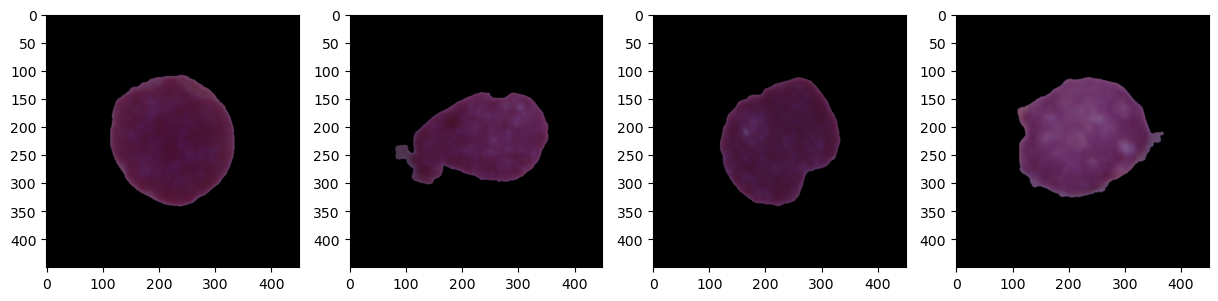

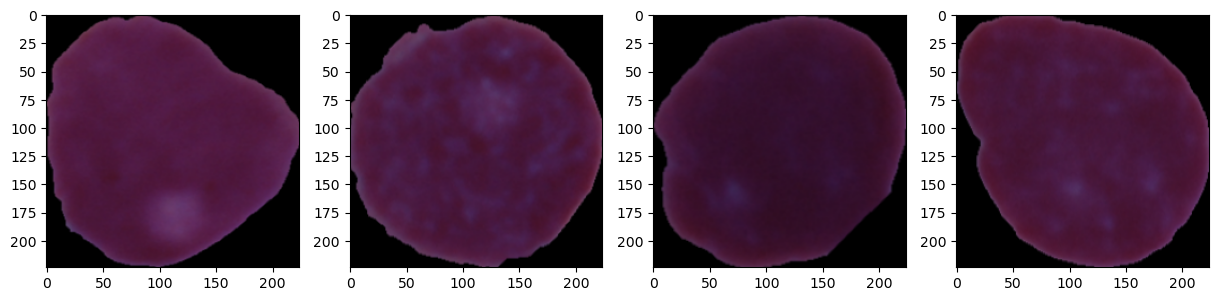

In [11]:
images_before_cropping(data_train)
images_after_cropping(img_list_test)

# Save the cropped images

In [ ]:
#This Cell Saves the Cropped Training Images in a folder

train_path_ALL = #insert path for training ALL cropped images(string format)
train_path_HEM = #insert path for training HEM cropped images (string format)

test_path_ALL = #insert path for test ALL cropped images (string format)
test_path_HEM = #insert path for test HEM cropped images (string format)


save_image(train_path_ALL, train_path_HEM, test_path_ALL, test_path_HEM, img_list_train, img_list_test)